<a href="https://colab.research.google.com/github/NisthaSharma/BrainTumor/blob/main/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [256, 256]

train_path = 'drive/MyDrive/Brain_tumor_detection/brain/Train'
valid_path = 'drive/MyDrive/Brain_tumor_detection/brain/Test'

In [6]:
inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
for layer in inceptionv3.layers:
    layer.trainable = False

In [8]:
folders = glob('drive/MyDrive/Brain_tumor_detection/brain/Train/*')

In [9]:
x = Flatten()(inceptionv3.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inceptionv3.input, outputs=prediction)

In [11]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                             

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('drive/MyDrive/Brain_tumor_detection/brain/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2924 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/Brain_tumor_detection/brain/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 200 images belonging to 2 classes.


In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
92/92 [==============================] - 624s 7s/step - loss: 1.1865 - accuracy: 0.8560 - val_loss: 0.6869 - val_accuracy: 0.8650
Epoch 2/10
92/92 [==============================] - 470s 5s/step - loss: 0.2413 - accuracy: 0.9449 - val_loss: 0.1114 - val_accuracy: 0.9700
Epoch 3/10
92/92 [==============================] - 471s 5s/step - loss: 0.1685 - accuracy: 0.9617 - val_loss: 0.0945 - val_accuracy: 0.9600
Epoch 4/10
92/92 [==============================] - 470s 5s/step - loss: 0.1560 - accuracy: 0.9620 - val_loss: 0.1232 - val_accuracy: 0.9650
Epoch 5/10
92/92 [==============================] - 476s 5s/step - loss: 0.1715 - accuracy: 0.9641 - val_loss: 0.1553 - val_accuracy: 0.9600
Epoch 6/10
92/92 [==============================] - 477s 5s/step - loss: 0.2647 - accuracy: 0.9614 - val_loss: 0.1028 - val_accuracy: 0.9800
Epoch 7/10
92/92 [==============================] - 474s 5s/step - loss: 0.0888 - accuracy: 0.9826 - val_loss: 0.0925 - val_accuracy: 0.9850
Epoch 8/10
92

In [20]:

import tensorflow as tf

from keras.models import load_model

model.save('model_inceptionv3.h5')

In [19]:
!zip -r ./file_inceptv3.zip ./model_inceptionv3/


  adding: model_inceptionv3/ (stored 0%)
  adding: model_inceptionv3/variables/ (stored 0%)
  adding: model_inceptionv3/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: model_inceptionv3/variables/variables.index (deflated 79%)
  adding: model_inceptionv3/saved_model.pb (deflated 92%)
  adding: model_inceptionv3/keras_metadata.pb (deflated 96%)
  adding: model_inceptionv3/assets/ (stored 0%)


In [21]:
from google.colab import files
files.download("./file_inceptv3.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

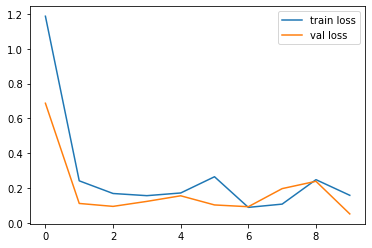

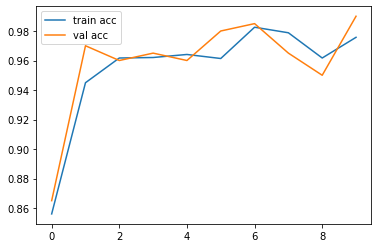

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')